In [13]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from mtcnn import MTCNN


def detect_face(img):
    detector = MTCNN()
    faces = detector.detect_faces(img)
    print(faces)
    return faces

In [20]:
import imutils
from imutils import face_utils
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [16]:
image = cv2.imread("test_align3.jpg")
image = imutils.resize(image, width=400)
f=detect_face(image)

[{'box': [30, 37, 74, 90], 'confidence': 0.9999521970748901, 'keypoints': {'left_eye': (46, 69), 'right_eye': (81, 70), 'nose': (58, 89), 'mouth_left': (47, 106), 'mouth_right': (76, 108)}}, {'box': [148, 13, 132, 155], 'confidence': 0.998345136642456, 'keypoints': {'left_eye': (181, 80), 'right_eye': (236, 61), 'nose': (216, 107), 'mouth_left': (207, 139), 'mouth_right': (255, 122)}}]


In [78]:
fa = FaceAligner(desiredFaceWidth=224)

[{'box': [30, 37, 74, 90], 'confidence': 0.9999521970748901, 'keypoints': {'left_eye': (46, 69), 'right_eye': (81, 70), 'nose': (58, 89), 'mouth_left': (47, 106), 'mouth_right': (76, 108)}}, {'box': [148, 13, 132, 155], 'confidence': 0.998345136642456, 'keypoints': {'left_eye': (181, 80), 'right_eye': (236, 61), 'nose': (216, 107), 'mouth_left': (207, 139), 'mouth_right': (255, 122)}}]
Original image before face detected


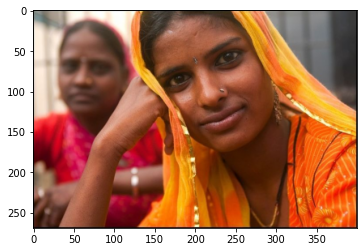

Aligned face


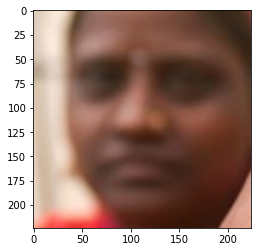

Aligned face


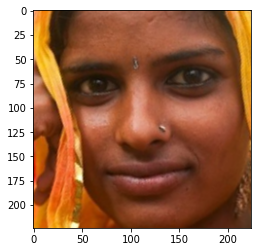

In [79]:
image = cv2.imread("test_align3.jpg")
image = imutils.resize(image, width=400)
f=detect_face(image)
print("Original image before face detected")
plt.imshow(image[:, :, ::-1])
plt.show()
for face in f:
    x,y,w,h=face['box']
    faceAligned = fa.align(image, face['keypoints']['left_eye'], face['keypoints']['right_eye'])
    print("Aligned face")
    plt.imshow(faceAligned[:, :, ::-1])
    plt.show()
    #cv2.imwrite(image_dir, faceAligned)
    

[{'box': [166, 34, 72, 92], 'confidence': 0.999546468257904, 'keypoints': {'left_eye': (187, 77), 'right_eye': (219, 69), 'nose': (208, 91), 'mouth_left': (197, 109), 'mouth_right': (224, 102)}}]
Original image before face detected


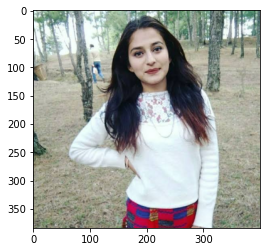

Aligned face


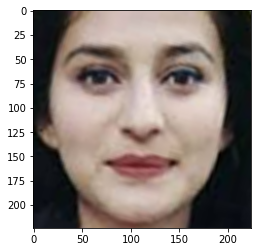

In [80]:
image = cv2.imread("test_align2.jpg")
image = imutils.resize(image, width=400)
f=detect_face(image)
print("Original image before face detected")
plt.imshow(image[:, :, ::-1])
plt.show()
for face in f:
    x,y,w,h=face['box']
    faceAligned = fa.align(image, face['keypoints']['left_eye'], face['keypoints']['right_eye'])
    print("Aligned face")
    plt.imshow(faceAligned[:, :, ::-1])
    plt.show()

In [77]:

class FaceAligner:
    def __init__(self, desiredLeftEye=(0.31, 0.31),
        desiredFaceWidth=224, desiredFaceHeight=None):
        # store the facial landmark predictor, desired output left
        # eye position, and desired output face width + height
        self.desiredLeftEye = desiredLeftEye
        self.desiredFaceWidth = desiredFaceWidth
        self.desiredFaceHeight = desiredFaceHeight
        # if the desired face height is None, set it to be the
        # desired face width (normal behavior)
        if self.desiredFaceHeight is None:
            self.desiredFaceHeight = self.desiredFaceWidth
    def align(self, image, left_eye, right_eye):
        
        # compute the angle between the eye centroids
        dY = right_eye[1] - left_eye[1]
        dX = right_eye[0] - left_eye[0]
        angle = np.degrees(np.arctan2(dY, dX))
        
        #compute the desired right eye x-coordinate based on the
        # desired x-coordinate of the left eye
        desiredRightEyeX = 1.0 - self.desiredLeftEye[0]
        
        # determine the scale of the new resulting image by taking
        # the ratio of the distance between eyes in the *current*
        # image to the ratio of distance between eyes in the
        # *desired* image
        dist = np.sqrt((dX ** 2) + (dY ** 2))
        desiredDist = (desiredRightEyeX - self.desiredLeftEye[0])
        desiredDist *= self.desiredFaceWidth
        scale = desiredDist / dist
        
        # compute center (x, y)-coordinates (i.e., the median point)
        # between the two eyes in the input image
        eyesCenter = (int((left_eye[0] + right_eye[0]) // 2),
                      int((left_eye[1] + right_eye[1]) // 2))
        # grab the rotation matrix for rotating and scaling the face
        #print(eyesCenter,angle,scale)
        M = cv2.getRotationMatrix2D(eyesCenter, angle, scale)
        # update the translation component of the matrix
        tX = self.desiredFaceWidth * 0.5
        tY = self.desiredFaceHeight * self.desiredLeftEye[1]
        M[0, 2] += (tX - eyesCenter[0])
        M[1, 2] += (tY - eyesCenter[1])
        
        # apply the affine transformation
        (w, h) = (self.desiredFaceWidth, self.desiredFaceHeight)
        output = cv2.warpAffine(image, M, (w, h),
                                flags=cv2.INTER_CUBIC)
        # return the aligned face
        return output

In [4]:
import tensorflow
import keras

print(tensorflow.__version__, keras.__version__)

2.6.0 2.6.0
